In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('salary_data_cleaned.csv')

In [4]:
df.head()

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,...,avg_salary,company_txt,job_state,same_state,age,python_yn,R_ym,spark,aws,excel
0,Sr. Data Scientist - Model Governance,$101K-$163K (Glassdoor est.),General Summary:\r\n\r\nThe position plays a c...,3.6,Elevate Credit\r\n3.6,"Addison, TX",-1,501 to 1000 Employees,2014,Company - Public,...,132.0,Elevate Credit\r\n,Addison,0,6,1,0,0,0,0
1,Customer Data Scientist,$101K-$163K (Glassdoor est.),We are looking for a Customer Data Scientist t...,4.6,Smartly.io\r\n4.6,"New York, NY",-1,201 to 500 Employees,2013,Company - Private,...,132.0,Smartly.io\r\n,New York,0,7,1,0,0,0,0
2,Data Engineer,$101K-$163K (Glassdoor est.),"Location: Washington, District of Columbia, Un...",4.5,Applied Information Sciences\r\n4.5,"Washington, DC",-1,501 to 1000 Employees,1982,Company - Private,...,132.0,Applied Information Sciences\r\n,Washington,0,38,0,0,1,0,1
3,Data Scientist,$101K-$163K (Glassdoor est.),Job Description:\r\n\r\nMetron is seeking tale...,3.0,"Metron, Inc.\r\n3.0","Reston, VA",-1,51 to 200 Employees,-1,Company - Private,...,132.0,"Metron, Inc.\r\n",Reston,0,-1,1,0,0,0,1
4,DATA SCIENTIST,$101K-$163K (Glassdoor est.),JOB SUMMARY\r\n\r\nThe position will focus on ...,3.8,Blessing Hospital\r\n3.8,"Quincy, IL",-1,1001 to 5000 Employees,1875,Nonprofit Organization,...,132.0,Blessing Hospital\r\n,Quincy,0,145,1,0,0,1,1


In [5]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'hourly', 'employer_provided', 'min_salary', 'max_salary', 'avg_salary',
       'company_txt', 'job_state', 'same_state', 'age', 'python_yn', 'R_ym',
       'spark', 'aws', 'excel'],
      dtype='object')

In [6]:
def title_simplifer(title):
    if 'data scientist'in title.lower():
        return 'data scientist'
    elif 'data engineer'in title.lower():
        return 'data engineer'
    elif 'analyst'in title.lower():
        return 'analyst'
    elif 'machine learning'in title.lower():
        return 'mle'
    elif 'manager' in title.lower():
        return 'manager'
    elif 'director'in title.lower():
        return'director'
    else:
        return 'na'
    
def seniority(title):
    if 'sr' in title.lower() or 'senior'in title.lower() or 'sr'in title.lower() or 'lead' in title.lower() or'principal'in title.lower():
        return'senior'
    elif 'jr' in title.lower()or 'jr'in title.lower():
        return'jr'
    else:
        return'na'
    
## job title and seniortiy 

## Fix state los Angeles

## Competitor count

## hourly wage to annual

#remove new line from job title


In [7]:
df['job_simp'] = df['Job Title'].apply(title_simplifer)

In [8]:
df.job_simp.value_counts()

data scientist    309
analyst            76
data engineer      54
na                 37
mle                20
manager             3
director            1
Name: job_simp, dtype: int64

In [9]:
df['seniority'] = df['Job Title'].apply(seniority)
df.seniority.value_counts()

na        430
senior     70
Name: seniority, dtype: int64

In [10]:
# Fix state Los Angeles
df.job_state.value_counts()

San Francisco     33
New York          26
Remote            17
Washington        14
McLean            14
                  ..
Pittsburgh         1
Fort Mill          1
Patuxent River     1
Memphis            1
Coraopolis         1
Name: job_state, Length: 176, dtype: int64

In [11]:
# job description Length
df['desc_len'] = df['Job Description'].apply(lambda x: len(x))
df['desc_len']

0      2766
1      3311
2      4621
3      1906
4      2569
       ... 
495    1199
496    4124
497    3553
498    3945
499    2278
Name: desc_len, Length: 500, dtype: int64

In [12]:
# Competitor count
df['num_comp'] = df['Competitors'].apply(lambda x: len("x") if x != '-1' else 0)

In [13]:
df['Competitors']

0     -1
1     -1
2     -1
3     -1
4     -1
      ..
495   -1
496   -1
497   -1
498   -1
499   -1
Name: Competitors, Length: 500, dtype: int64

In [14]:
# hourly wage to annual
df['min_salary'] = df.apply(lambda x: x.min_salary*2 if x.hourly ==1 else x.min_salary, axis=1)
df['max_salary'] = df.apply(lambda x: x.max_salary*2 if x.hourly ==1 else x.max_salary, axis=1)

In [15]:
df[df.hourly ==0][['hourly','min_salary','max_salary']]

,hourly,min_salary,max_salary
0,0,101,163
1,0,101,163
2,0,101,163
3,0,101,163
4,0,101,163
...,...,...,...
495,0,78,133
496,0,78,133
497,0,78,133
498,0,78,133


In [16]:
df['company_txt'] = df.company_txt.apply(lambda x: x.replace('\n',''))

In [17]:
df.describe()

,Rating,Headquarters,Founded,Competitors,hourly,employer_provided,min_salary,max_salary,avg_salary,same_state,age,python_yn,R_ym,spark,aws,excel,desc_len,num_comp
count,500.000000,500.0,500.000000,500.0,500.0,500.0,500.000000,500.00000,500.000000,500.0,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.0
mean,3.777000,-1.0,1829.404000,-1.0,0.0,0.0,82.584000,136.52800,109.556000,0.0,32.880000,0.716000,0.008000,0.230000,0.268000,0.444000,3794.930000,1.0
std,0.954082,0.0,534.173252,0.0,0.0,0.0,21.025868,31.49026,26.221652,0.0,37.850587,0.451388,0.089173,0.421254,0.443361,0.497352,1615.745531,0.0
min,-1.000000,-1.0,-1.000000,-1.0,0.0,0.0,35.000000,63.00000,49.000000,0.0,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,132.000000,1.0
25%,3.500000,-1.0,1958.000000,-1.0,0.0,0.0,76.000000,122.00000,99.000000,0.0,8.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2742.750000,1.0
50%,3.900000,-1.0,1997.000000,-1.0,0.0,0.0,86.000000,142.00000,114.500000,0.0,19.000000,1.000000,0.000000,0.000000,0.000000,0.000000,3632.000000,1.0
75%,4.400000,-1.0,2009.000000,-1.0,0.0,0.0,97.000000,158.00000,127.500000,0.0,42.000000,1.000000,0.000000,0.000000,1.000000,1.000000,4702.250000,1.0
max,5.000000,-1.0,2019.000000,-1.0,0.0,0.0,118.000000,193.00000,155.500000,0.0,210.000000,1.000000,1.000000,1.000000,1.000000,1.000000,11524.000000,1.0


In [18]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'hourly', 'employer_provided', 'min_salary', 'max_salary', 'avg_salary',
       'company_txt', 'job_state', 'same_state', 'age', 'python_yn', 'R_ym',
       'spark', 'aws', 'excel', 'job_simp', 'seniority', 'desc_len',
       'num_comp'],
      dtype='object')

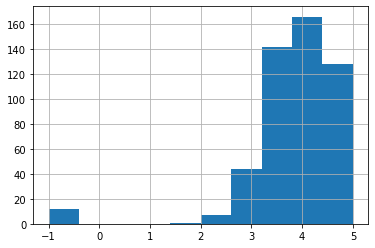

In [19]:
df.Rating.hist()

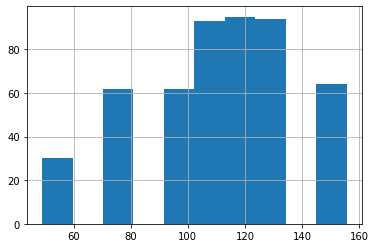

In [20]:
df.avg_salary.hist()

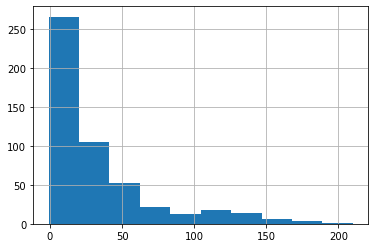

In [21]:
df.age.hist()

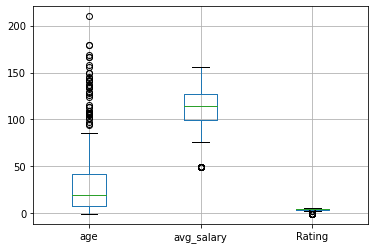

In [22]:
df.boxplot(column = ['age','avg_salary','Rating'])

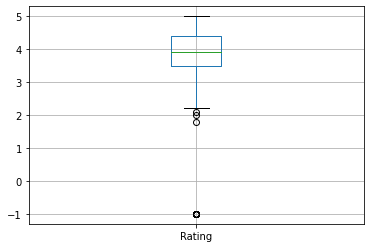

In [23]:
df.boxplot(column = 'Rating')

In [24]:
df[['age','avg_salary','Rating','desc_len']].corr()

,age,avg_salary,Rating,desc_len
age,1.000000,-0.022759,0.013997,0.184753
avg_salary,-0.022759,1.000000,0.077680,-0.034525
Rating,0.013997,0.077680,1.000000,0.038942
desc_len,0.184753,-0.034525,0.038942,1.000000


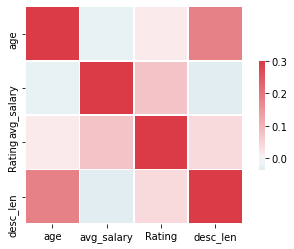

In [25]:
cmap =sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(df[['age','avg_salary','Rating','desc_len']].corr(), vmax=.3 , center=0, cmap=cmap,
           square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [26]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'hourly', 'employer_provided', 'min_salary', 'max_salary', 'avg_salary',
       'company_txt', 'job_state', 'same_state', 'age', 'python_yn', 'R_ym',
       'spark', 'aws', 'excel', 'job_simp', 'seniority', 'desc_len',
       'num_comp'],
      dtype='object')

In [27]:
df_cat = df[['Location', 'Headquarters', 'Size', 'Type of ownership', 'Industry', 'Sector', 'Revenue', 'company_txt', 'job_state', 'same_state', 'python_yn', 'R_ym',
       'spark', 'aws', 'excel', 'job_simp', 'seniority']]

graph for Location: total = 176


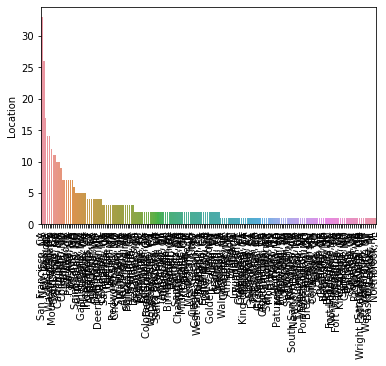

graph for Headquarters: total = 1


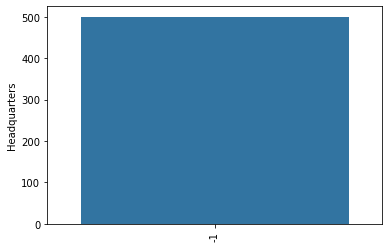

graph for Size: total = 9


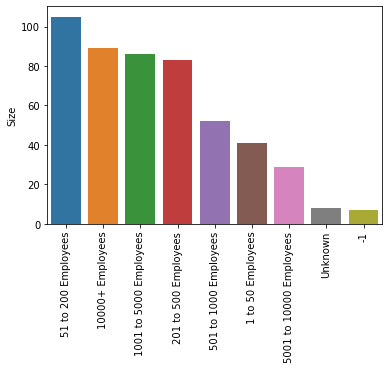

graph for Type of ownership: total = 11


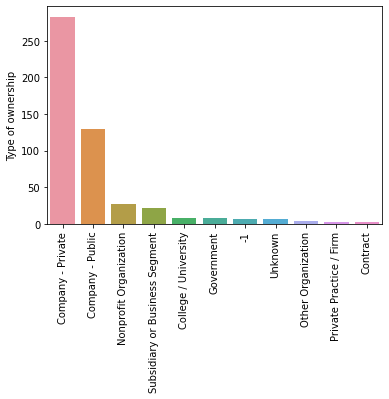

graph for Industry: total = 67


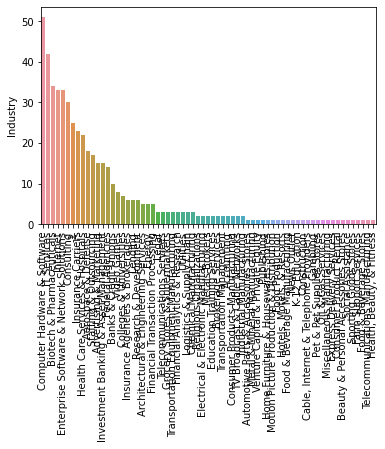

graph for Sector: total = 24


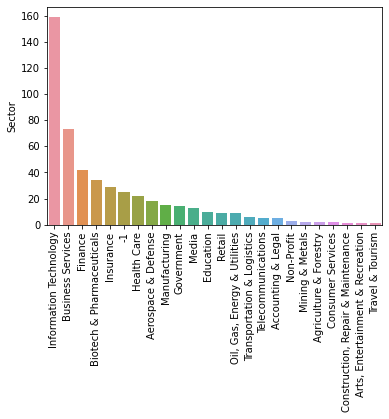

graph for Revenue: total = 14


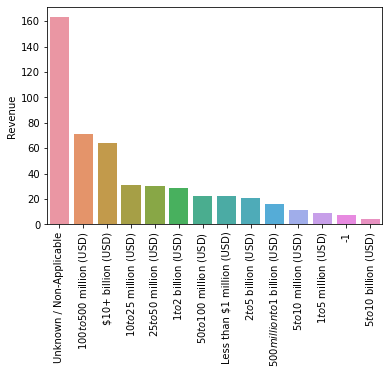

graph for company_txt: total = 378


C:\Users\MGilSoriano\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 13 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\MGilSoriano\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:183: RuntimeWarning: Glyph 13 missing from current font.
  font.set_text(s, 0, flags=flags)


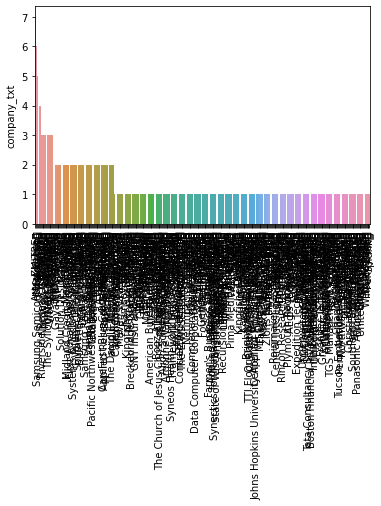

graph for job_state: total = 176


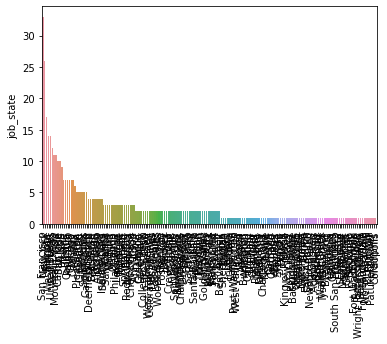

graph for same_state: total = 1


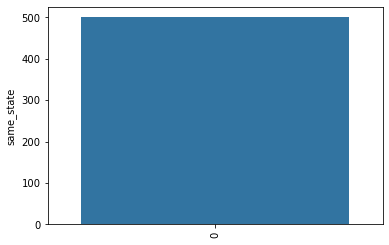

graph for python_yn: total = 2


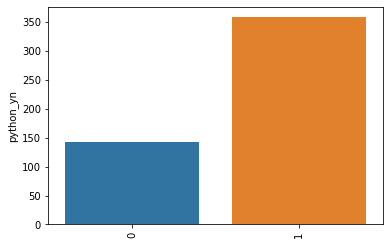

graph for R_ym: total = 2


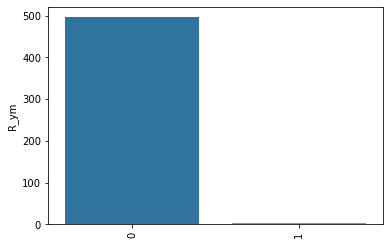

graph for spark: total = 2


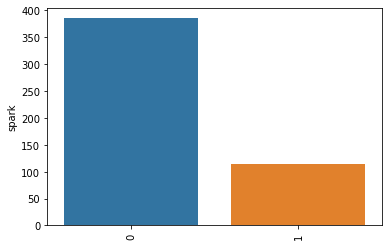

graph for aws: total = 2


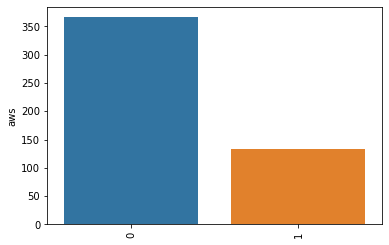

graph for excel: total = 2


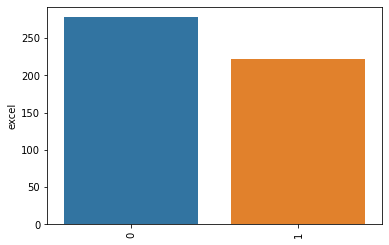

graph for job_simp: total = 7


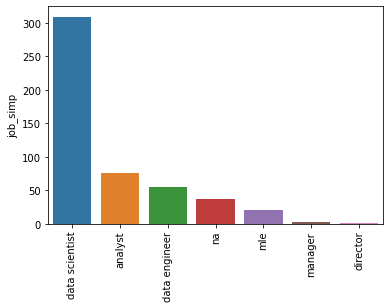

graph for seniority: total = 2


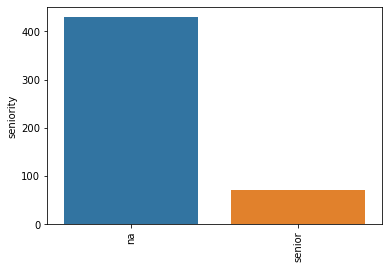

In [28]:
for i in df_cat.columns:
    cat_num = df_cat[i].value_counts()
    print("graph for %s: total = %d" % (i, len(cat_num)))
    chart = sns.barplot(x=cat_num.index, y=cat_num)
    chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
    plt.show()

graph for Location: total = 18


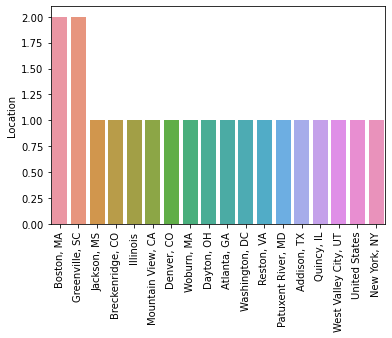

graph for Headquarters: total = 1


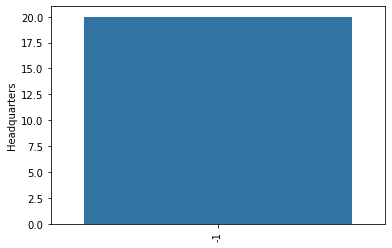

graph for company_txt: total = 19


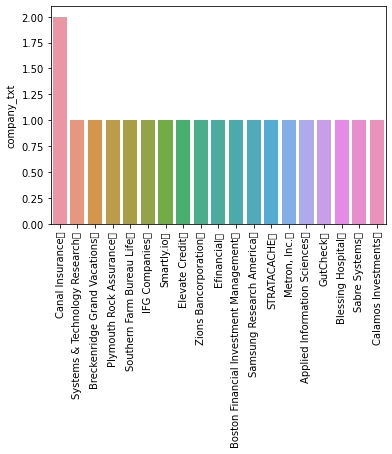

In [29]:
for i in df_cat[['Location','Headquarters','company_txt']].columns:
    cat_num = df_cat[i][:20].value_counts()
    print("graph for %s: total = %d" % (i, len(cat_num)))
    chart = sns.barplot(x=cat_num.index, y=cat_num)
    chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
    plt.show()

In [30]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'hourly', 'employer_provided', 'min_salary', 'max_salary', 'avg_salary',
       'company_txt', 'job_state', 'same_state', 'age', 'python_yn', 'R_ym',
       'spark', 'aws', 'excel', 'job_simp', 'seniority', 'desc_len',
       'num_comp'],
      dtype='object')

In [31]:
pd.pivot_table(df, index = ['job_simp', 'seniority'], values = 'avg_salary')

avg_salary
job_simp       seniority            
analyst        na         114.115385
               senior     111.727273
data engineer  na         111.744898
               senior      87.700000
data scientist na         106.607692
               senior     117.908163
director       na         111.000000
manager        na         112.500000
mle            na         114.735294
               senior     104.666667
na             na         109.100000
               senior      95.250000

In [32]:
pd.options.display.max_rows
pd.set_option('display.max_rows', None)

In [33]:
pd.pivot_table(df, index = ['job_state','job_simp'], values = 'avg_salary', aggfunc = 'count').sort_values('job_state', ascending = False)

avg_salary
job_state            job_simp                  
Yardley              data scientist           1
                     analyst                  1
Yakima               analyst                  1
Wright Patterson AFB na                       1
Woodland Hills       data scientist           1
                     analyst                  1
Woburn               mle                      1
                     data scientist           2
West Valley City     analyst                  1
West Palm Beach      analyst                  2
Wellesley            data scientist           2
Waterbury            analyst                  1
Washington           data engineer            1
                     analyst                  3
                     data scientist           9
                     na                       1
Waltham              na                       1
                     data engineer            2
Walnut Creek         data scientist           1
Virginia             mle                      1
                     data engineer            2
Vienna               data scientist           2
                     analyst                  1
Utah                 data scientist           1
                     analyst                  1
United States        analyst                  3
                     na                       1
                     data scientist           5
                     data engineer            3
Union City           analyst                  2
Tysons Corner        na                       1
Tucson               analyst                  3
Towson               analyst                  1
Timonium             analyst                  2
Tempe                data scientist           1
Tampa                analyst                  1
Syracuse             na                       1
Stamford             data scientist           1
Springfield          data scientist           3
South San Francisco  data scientist           1
Somerset             analyst                  1
Sheboygan            data scientist           1
Seattle              data engineer            1
                     data scientist           2
                     mle                      2
Scottsdale           data scientist           1
Santa Monica         data scientist           1
Santa Cruz           data scientist           2
Santa Clara          data scientist           3
Santa Barbara        manager                  2
San Mateo            data scientist           2
San Jose             na                       4
                     data scientist           6
San Francisco        mle                      2
                     data scientist          31
San Diego            analyst                  2
                     na                       2
                     data scientist           7
San Carlos           data scientist           3
San Antonio          data engineer            1
Salt Lake City       data scientist           2
Saint Paul           data scientist           1
Saint Louis          data scientist           2
                     data engineer            2
                     analyst                  1
Rockville            analyst                  1
Richmond             data engineer            1
Richland             data scientist           4
Reston               data scientist           1
                     data engineer            2
Remote               mle                      2
                     data scientist          13
                     data engineer            1
                     analyst                  1
Redwood City         data scientist           3
Raleigh              data engineer            1
                     data scientist           3
Quincy               data scientist           1
Portland             analyst                  1
Port Washington      data scientist           1
Pomona               data scientist           2
Pleasanton           na                       1
     

In [34]:
pd.pivot_table(df[df.job_simp == 'data scientist'], index = 'job_state', values = 'avg_salary').sort_values('avg_salary', ascending = False)

,avg_salary
job_state,
Aurora,155.500000
Santa Monica,146.000000
Port Washington,146.000000
New Jersey,146.000000
Alexandria,143.750000
Denver,143.750000
Gaithersburg,135.166667
Redwood City,132.333333
Addison,132.000000


In [35]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'hourly', 'employer_provided', 'min_salary', 'max_salary', 'avg_salary',
       'company_txt', 'job_state', 'same_state', 'age', 'python_yn', 'R_ym',
       'spark', 'aws', 'excel', 'job_simp', 'seniority', 'desc_len',
       'num_comp'],
      dtype='object')

In [36]:
# rating, industry, sector, revenue, muber of comp, hourly, employer provided, python, r, spark, aws, excel, desc_len, Type of ownership

In [37]:
df_pivots = df[['Rating', 'Industry', 'Sector', 'Revenue', 'num_comp', 'hourly', 'employer_provided', 'python_yn', 'avg_salary', 'spark', 'aws', 'excel', 'Type of ownership']]

In [38]:
for i in df_pivots.columns:
    print(i)
    print(pd.pivot_table(df_pivots, index = i, values= 'avg_salary').sort_values('avg_salary',ascending = False))

Rating
        avg_salary
Rating            
 1.8    155.500000
 4.3    119.933333
 3.9    118.396552
 4.9    118.055556
 3.6    117.552632
 4.5    117.539474
 3.5    114.729730
 3.7    112.937500
 4.8    112.722222
 5.0    112.025000
 2.9    110.214286
 3.4    109.675000
 4.2    108.593750
 3.2    108.027778
 4.7    108.000000
 4.1    107.741935
 2.5    107.500000
 3.0    106.722222
 3.3    106.406250
 3.8    104.857143
 4.0    104.303030
 4.6    103.976190
 2.7    101.000000
-1.0    101.000000
 2.8    100.250000
 3.1     99.000000
 2.1     99.000000
 4.4     98.725000
 2.2     75.500000
 2.0     75.500000
 2.6     62.250000
Industry
                                          avg_salary
Industry                                            
Food & Beverage Manufacturing             146.000000
Hotels, Motels, & Resorts                 132.000000
Religious Organizations                   131.000000
Consumer Products Manufacturing           130.250000
TV Broadcast & Cable Networks          

ValueError: Grouper for 'avg_salary' not 1-dimensional

In [ ]:
pd.pivot_table(df_pivots, index = 'Revenue', columns = 'python_yn', values = 'avg_salary', aggfunc ='count')

In [39]:
df.to_csv('eda_data.csv', index = False)